<a href="https://colab.research.google.com/github/ivan890617/Cluster-practice/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

In [3]:
!wget https://raw.githubusercontent.com/ivan890617/Cluster-practice/main/all_data.csv

--2022-04-23 07:30:02--  https://raw.githubusercontent.com/ivan890617/Cluster-practice/main/all_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11475817 (11M) [text/plain]
Saving to: ‘all_data.csv.1’

all_data.csv.1      100%[===================>]  10.94M  --.-KB/s    in 0.1s    

2022-04-23 07:30:02 (95.7 MB/s) - ‘all_data.csv.1’ saved [11475817/11475817]



# **Read the data**

In [6]:
data = pd.read_csv('all_data.csv')
data.head()

,Unnamed: 0,Datetime,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJME_MW,PJMW_MW
0,0,2004-12-31 01:00:00,13478.0,NaN,1596.0,NaN,NaN,NaN,NaN,NaN,9810.0,27160.0,5285.0
1,1,2004-12-31 02:00:00,12865.0,NaN,1517.0,NaN,NaN,NaN,NaN,NaN,9001.0,25791.0,5085.0
2,2,2004-12-31 03:00:00,12577.0,NaN,1486.0,NaN,NaN,NaN,NaN,NaN,8509.0,25052.0,4944.0
3,3,2004-12-31 04:00:00,12517.0,NaN,1469.0,NaN,NaN,NaN,NaN,NaN,8278.0,24797.0,4916.0
4,4,2004-12-31 05:00:00,12670.0,NaN,1472.0,NaN,NaN,NaN,NaN,NaN,8089.0,25026.0,4960.0


# **Define the Elbow method**

In [7]:
def elbow_met(x):
  WCSS = []
  for i in range(1,11):
      model = KMeans(n_clusters = i,init = 'k-means++')
      model.fit(x)
      WCSS.append(model.inertia_)
  fig = plt.figure(figsize = (7,7))
  plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
  plt.xticks(np.arange(11))
  plt.xlabel("Number of clusters")
  plt.ylabel("WCSS")
  plt.show()


Based on the elnow method,we should divided into three categories

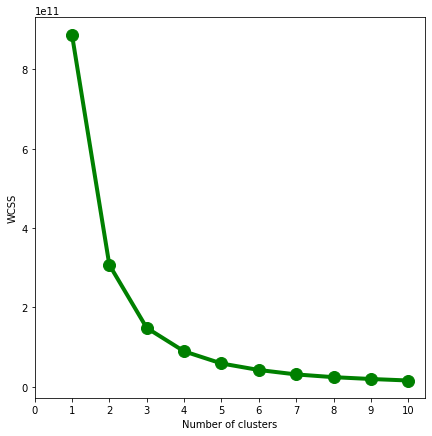

In [8]:
x = pd.DataFrame(data,columns=['AEP_MW'])
elbow_met(x)

# **Define the function to let Kmeans category by the size of cluster_centers**

In [9]:
def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

Start kmeans cluster and divided into three group



In [10]:
df = pd.DataFrame(data,columns=['Datetime','AEP_MW'])
kmeans = KMeans(n_clusters=3)
cluster = sorted_cluster(df[['AEP_MW']], kmeans)
df['label'] = cluster.labels_
df['label'] = df['label']+1

#df['label'] = kmeans.fit_predict(df[['AEP_MW']])
#df = df[0:100]

show the result

In [11]:
df

,Datetime,AEP_MW,label
0,2004-12-31 01:00:00,13478.0,1
1,2004-12-31 02:00:00,12865.0,1
2,2004-12-31 03:00:00,12577.0,1
3,2004-12-31 04:00:00,12517.0,1
4,2004-12-31 05:00:00,12670.0,1
...,...,...,...
125356,2018-01-01 20:00:00,21089.0,3
125357,2018-01-01 21:00:00,20999.0,3
125358,2018-01-01 22:00:00,20820.0,3
125359,2018-01-01 23:00:00,20415.0,3


show the scatter

<function matplotlib.pyplot.show>

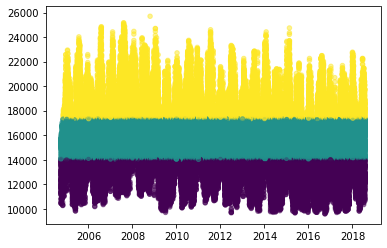

<Figure size 7200x7200 with 0 Axes>

In [12]:
df['Datetime'] = [pd.to_datetime(d) for d in df['Datetime']]
plt.scatter(df['Datetime'],df['AEP_MW'], c= df['label'].astype(float), s=20, alpha=0.5)
plt.figure(figsize=(100,100))
plt.show

shoe the scatter of the first 100 data

<function matplotlib.pyplot.show>

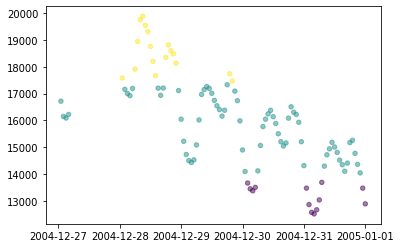

<Figure size 7200x7200 with 0 Axes>

In [13]:
plt.scatter(df['Datetime'][0:100],df['AEP_MW'][0:100], c= df['label'][0:100].astype(float), s=20, alpha=0.5)
plt.figure(figsize=(100,100))
plt.show

# **cluster each group into 3 sub-clusters**


Again,use Elbow method for each group


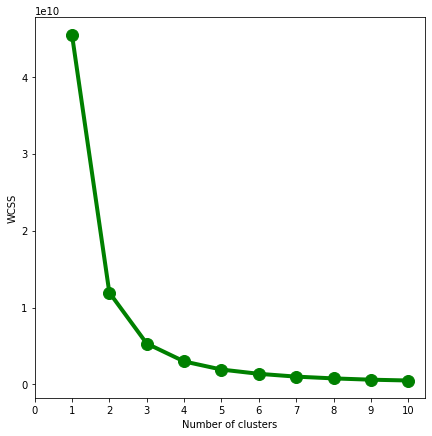

In [14]:
#Level 1
filter_1 = (df['label'] == 1)
fil_1 = df.loc[filter_1]
a = pd.DataFrame(fil_1,columns=['AEP_MW'])
elbow_met(a)

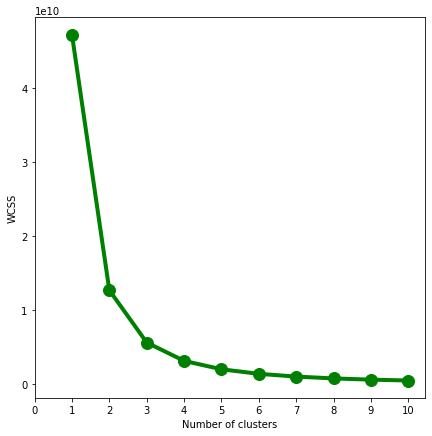

In [15]:
#Level 2
filter_2 = (df['label'] == 2)
fil_2 = df.loc[filter_2]
b = pd.DataFrame(fil_2,columns=['AEP_MW'])
elbow_met(b)

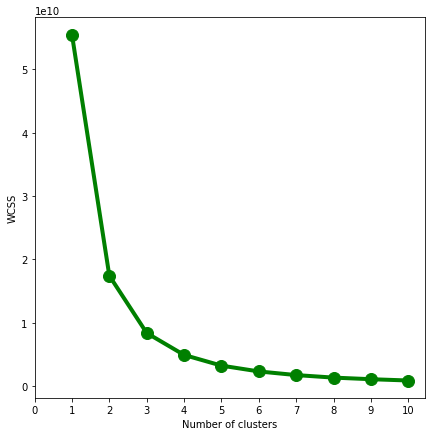

In [16]:
#Level 3
filter_3 = (df['label'] == 3)
fil_3 = df.loc[filter_3]
c = pd.DataFrame(fil_3,columns=['AEP_MW'])
elbow_met(c)

Start kmeans cluster and divided each group into three sub-clusters

In [ ]:
kmeans = KMeans(n_clusters=3)

cluster1 = sorted_cluster(fil_1[['AEP_MW']], kmeans)
fil_1['sub_label'] = cluster1.labels_
fil_1['sub_label'] = fil_1['sub_label']+1
#fil_1['Datetime'] = [pd.to_datetime(d) for d in fil_1['Datetime']]

cluster2 = sorted_cluster(fil_2[['AEP_MW']], kmeans)
fil_2['sub_label'] = cluster2.labels_
fil_2['sub_label'] = fil_2['sub_label']+4
#fil_2['Datetime'] = [pd.to_datetime(d) for d in fil_2['Datetime']]

cluster3 = sorted_cluster(fil_3[['AEP_MW']], kmeans)
fil_3['sub_label'] = cluster3.labels_
fil_3['sub_label'] = fil_3['sub_label']+7
#fil_3['Datetime'] = [pd.to_datetime(d) for d in fil_3['Datetime']]


append the sub_label into DataFrame

In [19]:
fil = fil_1.append(fil_2)
fil = fil.append(fil_3)
fil

,Datetime,AEP_MW,label,sub_label
0,2004-12-31 01:00:00,13478.0,1,3
1,2004-12-31 02:00:00,12865.0,1,2
2,2004-12-31 03:00:00,12577.0,1,2
3,2004-12-31 04:00:00,12517.0,1,2
4,2004-12-31 05:00:00,12670.0,1,2
...,...,...,...,...
125356,2018-01-01 20:00:00,21089.0,3,9
125357,2018-01-01 21:00:00,20999.0,3,9
125358,2018-01-01 22:00:00,20820.0,3,9
125359,2018-01-01 23:00:00,20415.0,3,8


Sort the data by Datetime

In [20]:
fil_sort = fil.sort_values(by='Datetime')
fil_sort

,Datetime,AEP_MW,label,sub_label
2183,2004-10-01 01:00:00,12379.0,1,2
2184,2004-10-01 02:00:00,11935.0,1,2
2185,2004-10-01 03:00:00,11692.0,1,2
2186,2004-10-01 04:00:00,11597.0,1,1
2187,2004-10-01 05:00:00,11681.0,1,2
...,...,...,...,...
120245,2018-08-02 20:00:00,17673.0,3,7
120246,2018-08-02 21:00:00,17303.0,2,6
120247,2018-08-02 22:00:00,17001.0,2,6
120248,2018-08-02 23:00:00,15964.0,2,5


show the scatter

<function matplotlib.pyplot.show>

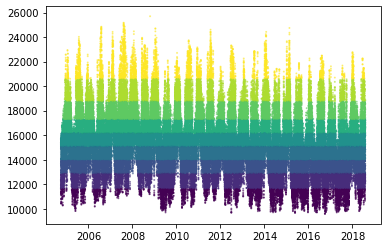

In [21]:
plt.scatter(fil['Datetime'],fil['AEP_MW'], c= fil['sub_label'].astype(float), s=1, alpha=0.5)
plt.show

save the result

In [23]:
fil_sort.to_csv('/content/result.csv')
